### Import modules

In [13]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()

# Define study
STUDY_NAME = "opt_flathv_500_1000_withBB_chroma15_2p3_sol_tune_tune_8b4e"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/base_collider/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/base_collider/xtrack_0004/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

### Load data

In [14]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df

normalized amplitude in xy-plane      qx      qy   
beam  qx     qy                                                         
lhcb1 62.305 60.309                             2.625  62.305  60.309  \
             60.310                             2.656  62.305  60.310   
             60.311                             2.750  62.305  60.311   
             60.312                             2.750  62.305  60.312   
             60.313                             2.719  62.305  60.313   
...                                               ...     ...     ...   
      62.323 60.328                             3.500  62.323  60.328   
             60.329                             3.156  62.323  60.329   
      62.324 60.328                             3.688  62.324  60.328   
             60.329                             3.219  62.324  60.329   
      62.325 60.329                             3.344  62.325  60.329   

                     i_bunch_b1  i_bunch_b2  num_particles_per_bunch  
beam  qx     qy                                                       
lhcb1 62.305 60.309      1963.0      1963.0             2.300000e+11  
             60.310      1963.0      1963.0             2.300000e+11  
             60.311      1963.0      1963.0             2.300000e+11  
             60.312      1963.0      1963.0             2.300000e+11  
             60.313      1963.0      1963.0             2.300000e+11  
...                         ...         ...                      ...  
      62.323 60.328      1963.0      1963.0             2.300000e+11  
             60.329      1963.0      1963.0             2.300000e+11  
      62.324 60.328      1963.0      1963.0             2.300000e+11  
             60.329      1963.0      1963.0             2.300000e+11  
      62.325 60.329      1963.0      1963.0             2.300000e+11  

[231 rows x 6 columns]

In [15]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,2.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,2.656,2.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,2.750,2.656,2.938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,2.750,2.625,2.875,3.062,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,2.719,2.688,2.844,3.250,3.094,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,2.781,2.656,2.781,3.000,3.062,3.250,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,2.781,2.656,2.875,3.094,3.031,3.531,4.781,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,2.688,2.656,3.031,3.031,3.031,3.719,4.562,4.312,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,2.750,2.375,2.969,3.188,2.969,3.812,4.719,4.375,4.688,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

### Plot heatmap for tune-tune scan

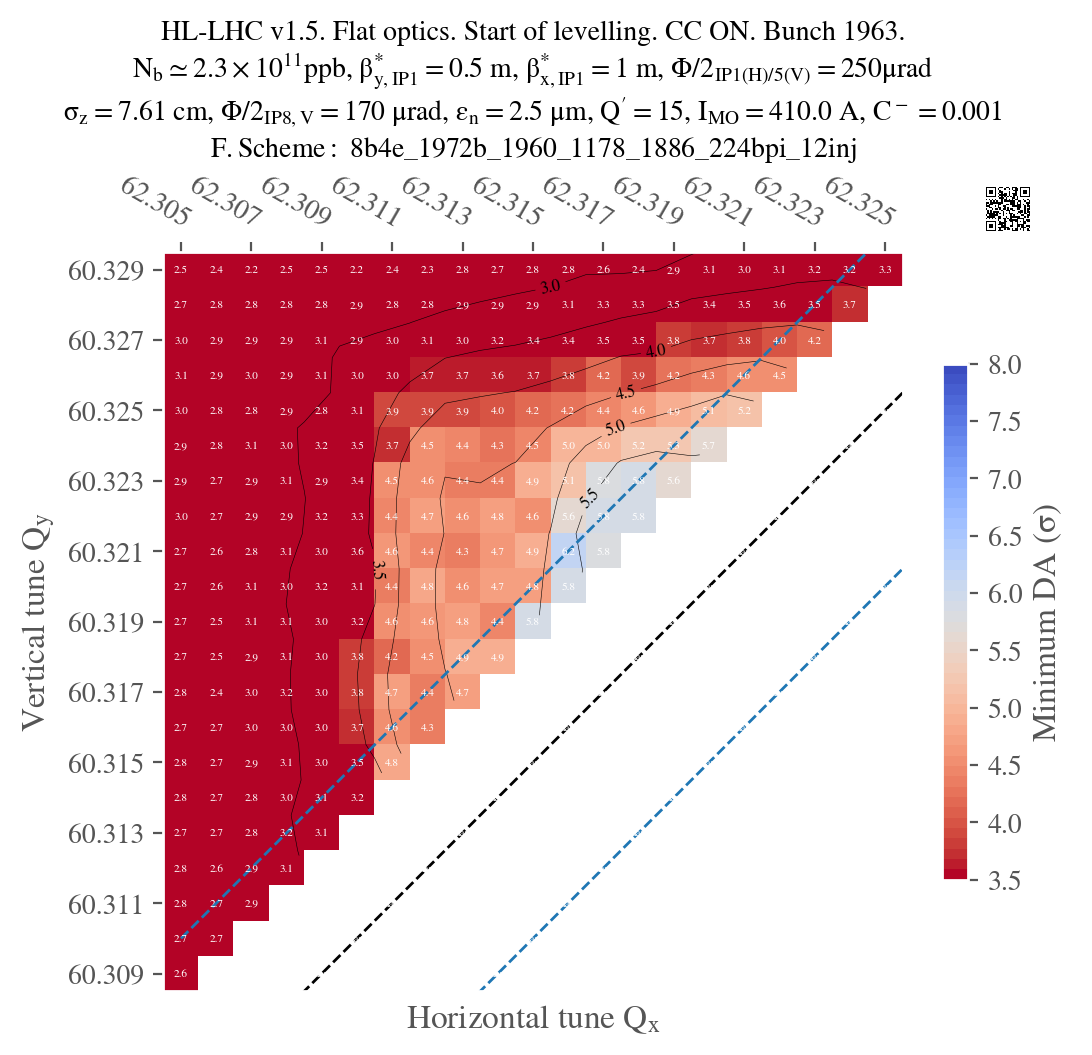

In [17]:
analysis_functions.plot_heatmap(df_to_plot, STUDY_NAME, link="https://cernbox.cern.ch/s/AVd1rFX6ZdK8uYD", plot_contours=True, conf_mad=conf_mad, conf_collider=conf_collider)

### Save study on EOS

In [18]:
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)